# 7. K-means Clustering and Principal Component Analysis

- 작성자: [JWarmenhoven's Exercise 7](https://nbviewer.jupyter.org/github/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/Programming%20Exercise%207%20-%20K-means%20Clustering%20and%20Principal%20Component%20Analysis.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

%matplotlib inline
import seaborn as sns
sns.set_context("notebook")
sns.set_style("white")

### K-means

#### first example

In [50]:
data1 = loadmat("/content/drive/My Drive/study/ML(Andrew Ng)/data/ex7data2.mat")
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [52]:
X1 = data1['X']
print("X1:", X1.shape)

X1: (300, 2)


In [56]:
km1 = KMeans(3)
km1.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

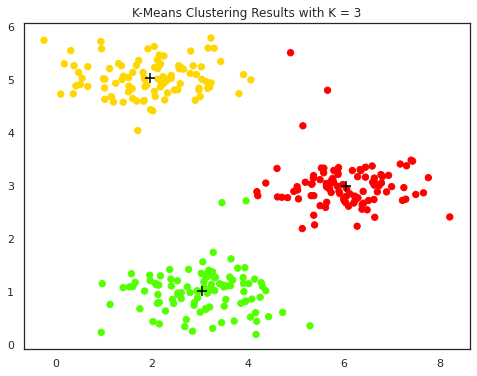

In [57]:
plt.figure(figsize = (8, 6))
plt.scatter(X1[:, 0], X1[:, 1], s = 40, c = km1.labels_, cmap = plt.cm.prism)
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1],
            marker = '+', s = 100, c = 'k', linewidths = 2)

plt.title("K-Means Clustering Results with K = 3")
plt.show()

#### image with K-means

In [58]:
img = plt.imread("https://nbviewer.jupyter.org/github/JWarmenhoven/Coursera-Machine-Learning/blob/master/notebooks/data/bird_small.png")
img.shape

(128, 128, 3)

In [61]:
km2 = KMeans(16)
km2.fit((img/255).reshape(img.shape[0] * img.shape[1], img.shape[2]))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C++ OpenCV에서 배웠는데, 범용?을 위해 image에 이용하는 적합 모델임에도 매개변수를 픽셀의 나열로 만들어놨다. 그래서 마치 squeeze를 사용한 것처럼 펼쳐놓은 것.

In [62]:
B = km2.cluster_centers_[km2.labels_].reshape(img.shape[0], img.shape[1], img.shape[2])

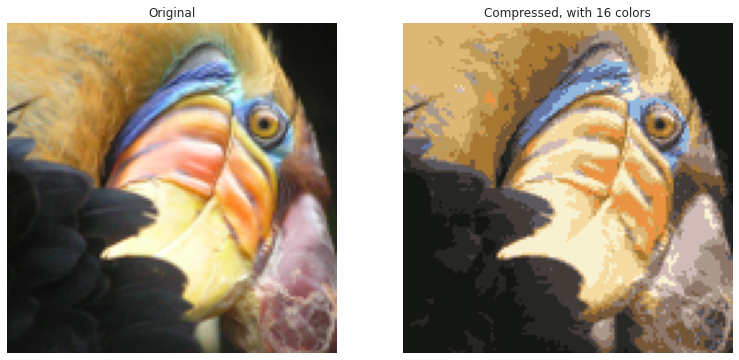

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 9))
ax1.imshow(img)
ax1.set_title("Original")

ax2.imshow(B * 255)
ax2.set_title("Compressed, with 16 colors")

for ax in fig.axes:
  ax.axis("off")

왼쪽 이미지의 픽셀 값을 255로 나눠 0과 1 사이의 값으로 만들고 각 픽셀의 3개의 값을 3차원 공간에서 K-Means를 통해 이웃을 찾게 시킨 것. 이때 같은 이웃을 만드는 공동체, K의 갯수를 16개로 제한했다.

이를 통해 비슷한 값의 구성(B, G, R)을 가진 이들을 같은 Cluster로 묶인 것을 B에 저장해두었는데, 이를 Original 그림과 함께 다시 0 ~ 255 사이의 값으로 재구성해 보인 것.

그래서 극단적이라 볼 수 있는 굉장히 특이한 값들을 가지고 있던 픽셀들이 정보를 일부 잃었다. 원본에는 연한 초록색과 꽤 붉은 색이 조금 있었지만, cluster를 통해 재구성된 그림에선 볼 수 없다.

#### PCA
- using scipy instead of scikit-learn

In [64]:
data2 = loadmat("/content/drive/My Drive/study/ML(Andrew Ng)/data/ex7data1.mat")
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [65]:
X2 = data2['X']
print("X2:", X2.shape)

X2: (50, 2)


In [66]:
scaler = StandardScaler()
scaler.fit(X2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
U, S, V = linalg.svd(scaler.transform(X2).T)
print(U, S, sep = "\n")

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[9.3153915  3.63641048]


StandardScaler 되게 모형 적합하듯 만들어놨네.<br />
그리고 python은 고윳값 분해를 linalg(.svd)에 시키는구나.

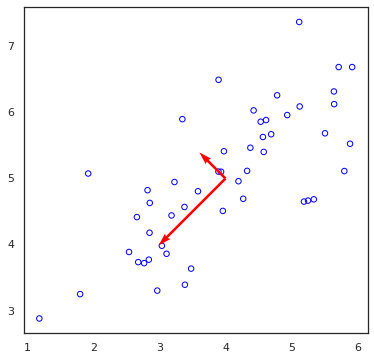

In [77]:
plt.figure(figsize = (8, 6))
plt.scatter(X2[:, 0], X2[:, 1], s = 30, edgecolors = 'b', facecolors = "None", linewidths = 1)

plt.quiver(scaler.mean_[0], scaler.mean_[1], U[0, 0], U[0, 1], scale = S[1], color = 'r')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[1, 0], U[1, 1], scale = S[0], color = 'r')

plt.gca().set_aspect("equal")
plt.show()

None은 그대로도 키워드인데, facecolors에 주는 모양새가 달라지네?<br />
그리고 고윳값 분해에서 찾은 고윳값들은 왜 절댓값으로 내림차순으로 안 됐지? 절댓값 변환이 안 된 건가?